# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [3]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [5]:
# Set up dependent and independent variables
y = df['churn']
X = df.drop(columns = ['id', 'churn'])

print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [6]:
# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Check the shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10954, 61)
(3652, 61)
(10954,)
(3652,)


In [7]:
# Check the distribution of the target variable
print(sum(y_train == 1))
print(sum(y_train == 0))

1053
9901


The class imbalance issue arises here where the number of observations in Category 1 is 9 times smaller than that in Category 0 --> This will not be dealt with in this exercise

### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [8]:
# Model training
model = RandomForestClassifier(n_estimators = 1000, random_state = 42) # Add parameters to the model!
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [9]:
# Generate predictions
y_pred = model.predict(X_test)

In [10]:
# Define a function to get all the metrics
def get_metrics(y_real, y_pred):
    
    # Get confusion matrix
    cm = confusion_matrix(y_real, y_pred)
    
    # Visualize confusion matrix with heatmap
    sns.heatmap(data = cm.T, annot = True, xticklabels = [0,1], yticklabels = [0,1], square = True, fmt = 'd', cmap = 'Blues')
    plt.xlabel('True labels')
    plt.ylabel('Predictions')
    plt.show()
    
    print('Accuracy Score:', accuracy_score(y_real, y_pred))
    print('Precision:', precision_score(y_real, y_pred, average = 'macro'))
    print('Recall:', recall_score(y_real, y_pred, average = 'macro'))
    print('F1-Score:', f1_score(y_real, y_pred, average = 'macro'))
    print('\nClassification Report:\n', classification_report(y_real, y_pred, digits = 3))

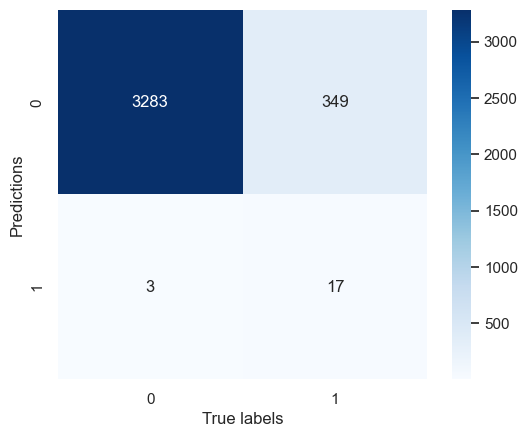

Accuracy Score: 0.9036144578313253
Precision: 0.876954845814978
Recall: 0.5227675616708074
F1-Score: 0.5186005719104776

Classification Report:
               precision    recall  f1-score   support

           0      0.904     0.999     0.949      3286
           1      0.850     0.046     0.088       366

    accuracy                          0.904      3652
   macro avg      0.877     0.523     0.519      3652
weighted avg      0.899     0.904     0.863      3652



In [11]:
get_metrics(y_test, y_pred)

In the report, several evaluation metrics were used including accuracy score, precision score, recall score, and f1-score. The model achieved an accuracy score of 90.4%, which may seem like a good model. However, from recall scores, it can be seen that the model tends to correctly identifies class 0, but fails to make true predictions about class 1. This poses an issue regarding data imbalance when class 0 is the dominant one in the dataset, as such, ML model often has the tendency to learn from and predict the majority class. 

While class 1 represents customer churn, this is hardly said a good model for predicting customer churn since the model was not good at capturing class 1.

## Model Understanding

In [28]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index()

In [29]:
feature_importances

,index,features,importance
0,0,cons_12m,0.053398
1,14,net_margin,0.052070
2,5,forecast_meter_rent_12m,0.050829
3,3,forecast_cons_12m,0.048348
4,12,margin_net_pow_ele,0.047846
...,...,...,...
56,54,channel_ewpakwlliwisiwduibdlfmalxowmwpci,0.002652
57,29,var_6m_price_peak_fix,0.002080
58,30,var_6m_price_mid_peak_fix,0.002075
59,4,forecast_discount_energy,0.001365


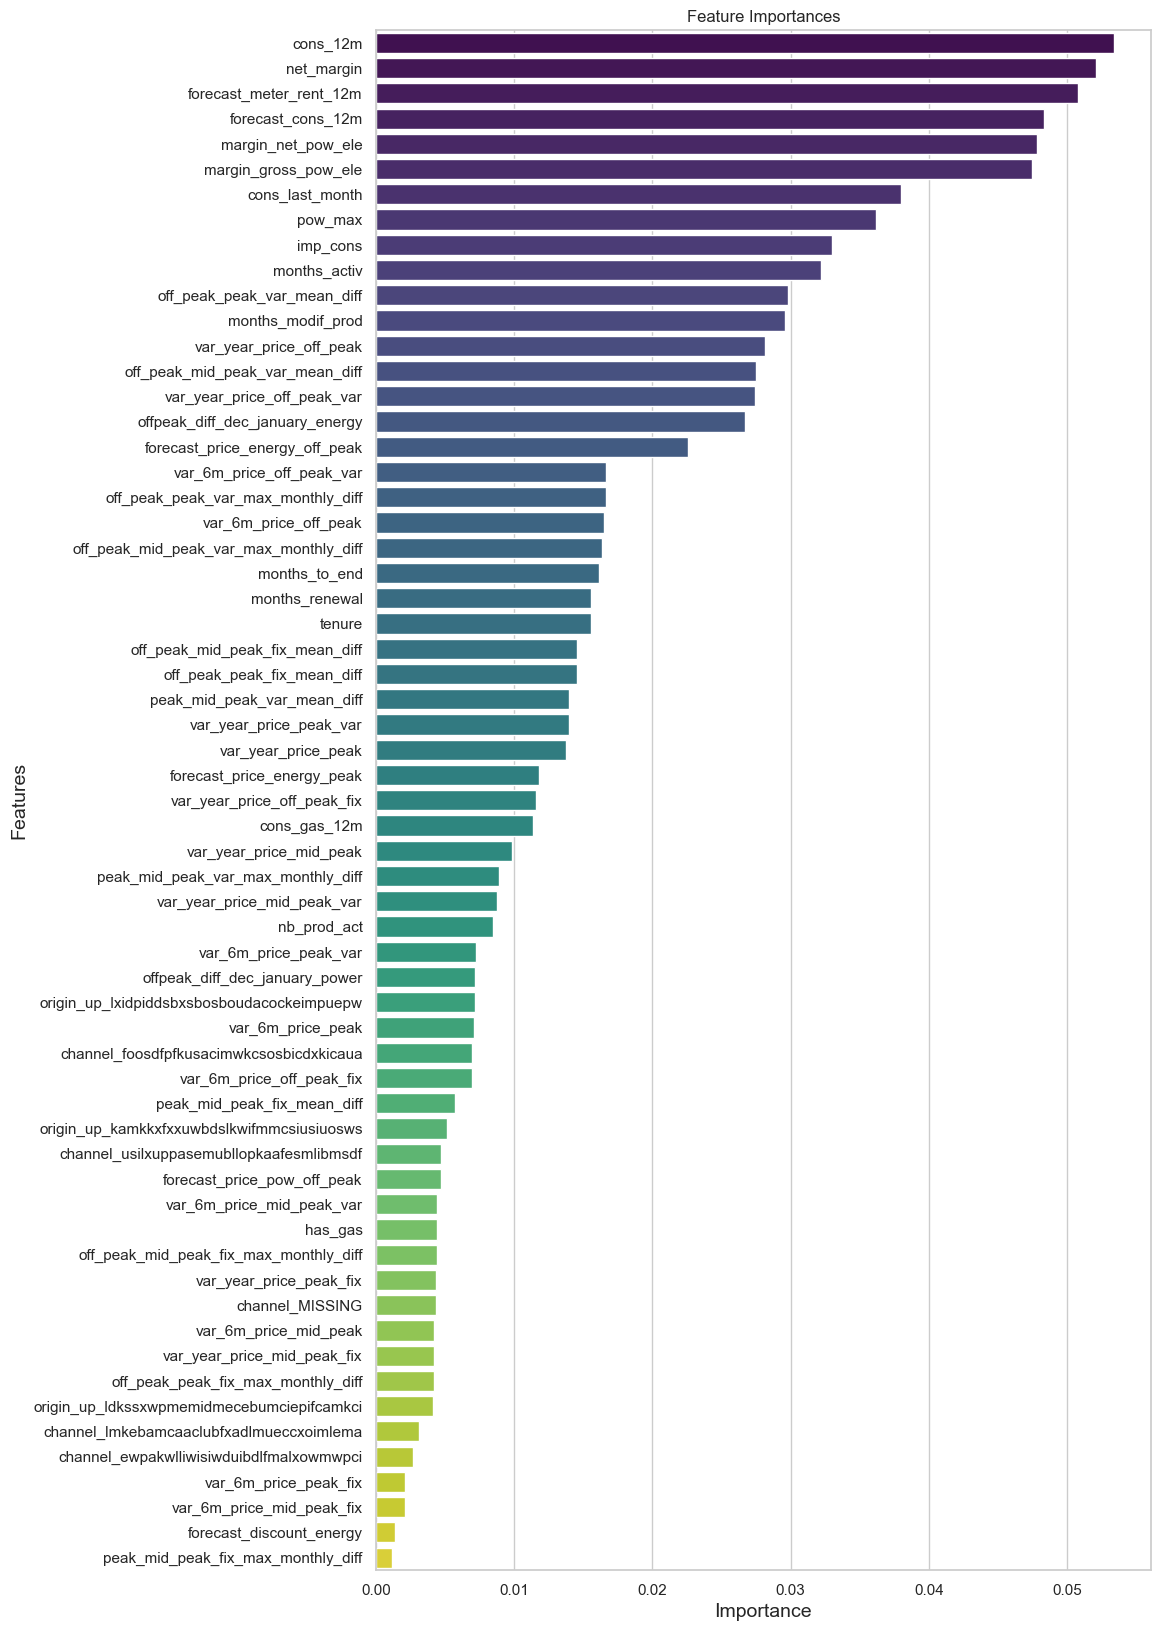

In [31]:
plt.figure(figsize=(10, 20))
plt.title('Feature Importances')

sns.set_theme(style='whitegrid')
sns.barplot(x='importance', y='features', data=feature_importances, palette='viridis')

plt.xlabel('Importance', fontsize=14)
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.ylabel('Features', fontsize=14)

plt.show()

The last observation is important because this relates back to our original hypothesis:

    > Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

In [36]:
# Get the prediction for each class
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1] # all rows, second columns

probabilities

array([0.119, 0.167, 0.042, ..., 0.173, 0.056, 0.101])

In [37]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

X_test

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,4.173390,4.193598,3.165541,3.168368,0.0,2.073828,0.114667,0.099548,40.606701,1,...,2,1,0,0,1,0,0,0,0,1
1,4.075036,0.000000,3.003461,3.305998,30.0,1.255031,0.198096,0.000000,46.305378,0,...,3,3,0,0,1,0,0,0,0,1
2,3.848435,0.000000,0.000000,2.756568,0.0,1.289366,0.141434,0.000000,44.311378,0,...,5,3,0,0,1,0,0,0,0,1
3,4.345433,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,44.311378,0,...,0,10,0,0,1,0,0,0,0,1
4,4.185655,0.000000,3.355834,3.208148,0.0,2.123067,0.120372,0.103487,40.606701,0,...,45,9,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,6.298161,5.541745,5.270979,3.310600,0.0,1.300378,0.165022,0.086380,44.311378,1,...,71,0,1,0,0,0,0,1,0,0
3648,3.608633,4.009323,2.838219,2.782859,0.0,1.291591,0.144038,0.000000,45.811378,1,...,2,0,1,0,0,0,0,0,0,1
3649,4.956725,0.000000,3.798374,3.935728,0.0,2.544006,0.101700,0.092659,58.995952,0,...,59,9,0,0,1,0,0,0,0,1
3650,3.931966,3.509874,2.352183,2.914845,0.0,1.288249,0.140621,0.000000,44.311378,1,...,42,6,0,0,0,1,0,0,0,1


In [38]:
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()

In [39]:
X_test.to_csv('out_of_sample_data_with_predictions.csv')